In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib
# matplotlib.use('pgf')

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import numpy as np

%matplotlib inline


c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
     '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

markerlist = ['o', 4, 5, 6, 7, 'p', 'd', 'P']


text_width = 5.60107  # in  --> Confirmed with template explanation
text_height = 9.0

fs_m1 = 7  # for figure ticks
fs = 9  # for regular figure text
fs_p1 = 10  # figure titles

axes_lw = 0.7

matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('axes', linewidth=axes_lw)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title


matplotlib.rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})

matplotlib.rc('text', usetex=True)

plt.rcParams.update({'text.latex.preamble': r'\usepackage{amsfonts}'})


def errorfill(ax, x, y, yerr, color=None, alpha_fill=0.3, alpha_line=1, lw=1, linestyle='-', fill_linewidths=0.2, marker=None, markersize=1, label=None):
    ax.fill_between(x, y - yerr, y + yerr, color=color, alpha=alpha_fill, linewidths=fill_linewidths)
    ax.plot(x, y, color=color, lw=lw, linestyle=linestyle, alpha=alpha_line, label=label, marker=marker, markersize=markersize)

def remove_xticks(ax):
    for tick in ax.xaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
    ax.xaxis.set_tick_params(which='minor', bottom=False, top=False)
    ax.xaxis.set_tick_params(which='major', bottom=False, top=False)
    ax.set_xticklabels([])
        
def remove_yticks(ax):
    for tick in ax.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
    ax.yaxis.set_tick_params(which='minor', left=False)
    ax.set_yticklabels([])


In [103]:
# load MAP / RMSE
# from scalable_gps.wandb_utils import load_runs_from_sweep

# sweep_id = 'jgkkbeu6'
# config_keys_rmse = ['dataset_name', 'dataset_config.split', 'inducing_train_config.clustering_length_scale_ratio']
# metric_keys_rmse = ['wall_clock_time', 'train/normalised_test_rmse', 'train/test_rmse']
# configs_and_metrics_rmse = load_runs_from_sweep(sweep_id, config_keys_rmse, metric_keys_rmse, entity='javierantoran', project='inducing_sgd_tests')

100%|██████████| 100/100 [01:19<00:00,  1.25it/s]


In [3]:
import numpy as np
import os

def get_splits(dataset):
    if dataset == '3droad':
        return [0, 1, 2, 4]
    elif dataset == 'houseelectric':
        return [0, 1, 2]
    else:
        return [0, 1, 2, 3, 4]

clustering_ratios = [0.5, 1, 2]

# datasets = ['protein']
datasets = ['3droad', 'song', 'buzz', 'houseelectric']

n_steps = 100

results_path = "./inducing_sgd_rmse.npy"

if os.path.isfile(results_path):
    results_rmse = np.load(results_path, allow_pickle=True).item()
# else:
#     results_rmse = dict()

# for dataset in datasets:
#     splits = get_splits(dataset)
#     n_splits = len(splits)

#     results_rmse[dataset] = dict()
#     for metric in metric_keys_rmse:
#         results_rmse[dataset][metric] = np.zeros((n_splits, len(clustering_ratios), n_steps))

# for (configs, metrics) in configs_and_metrics_rmse:
#     dataset = configs['dataset_name']
#     split = configs['dataset_config.split']
#     ratio = configs['inducing_train_config.clustering_length_scale_ratio']

#     splits = get_splits(dataset)
#     if split not in splits:
#         continue
#     if ratio not in clustering_ratios:
#         continue
#     # print(dataset, split)
#     # print(ratio, metrics['wall_clock_time'])

#     split_idx = splits.index(split)
#     clustering_idx = clustering_ratios.index(ratio)

#     for metric in metric_keys_rmse:
#         results_rmse[dataset][metric][split_idx, clustering_idx] = metrics[metric]
# np.save(results_path, results_rmse)

In [105]:
# load samples / LLH
# from scalable_gps.wandb_utils import load_runs_from_sweep

# sweep_id = 'v6w9zeny'
# config_keys_llh = ['dataset_name', 'dataset_config.split', 'inducing_train_config.clustering_length_scale_ratio']
# metric_keys_llh = ['kept_points', 'normalised_test_llh', 'test_llh']
# configs_and_metrics_llh = load_runs_from_sweep(sweep_id, config_keys_llh, metric_keys_llh, entity='javierantoran', project='inducing_sgd_tests')

100%|██████████| 25/25 [00:51<00:00,  2.06s/it]


In [106]:
# load samples / LLH
# from scalable_gps.wandb_utils import load_runs_from_sweep

# sweep_id = 'mvrsis0n'
# config_keys_llh = ['dataset_name', 'dataset_config.split', 'inducing_train_config.clustering_length_scale_ratio']
# metric_keys_llh = ['kept_points', 'normalised_test_llh', 'test_llh']
# configs_and_metrics_llh_rescue = load_runs_from_sweep(sweep_id, config_keys_llh, metric_keys_llh, entity='javierantoran', project='inducing_sgd_tests')

100%|██████████| 10/10 [00:19<00:00,  1.94s/it]


In [4]:
# load samples / LLH

def get_n_steps(dataset):
    if dataset == 'houseelectric':
        return 70
    else:
        return 100

datasets = ['houseelectric']
# datasets = ['3droad', 'song', 'buzz', 'houseelectric']

results_path = "./inducing_sgd_llh.npy"

if os.path.isfile(results_path):
    results_llh = np.load(results_path, allow_pickle=True).item()
else:
    results_llh = dict()

# for dataset in datasets:
#     splits = get_splits(dataset)
#     n_splits = len(splits)
#     n_steps = get_n_steps(dataset)

#     results_llh[dataset] = dict()
#     for metric in ['normalised_test_llh', 'test_llh']:
#         results_llh[dataset][metric] = np.zeros((n_splits, len(clustering_ratios), n_steps))
#     results_llh[dataset]['kept_points'] = np.zeros((n_splits, len(clustering_ratios)))

# for (configs, metrics) in configs_and_metrics_llh:
#     # dataset = configs['dataset_name']
#     split = configs['dataset_config.split']
#     ratio = configs['inducing_train_config.clustering_length_scale_ratio']

#     splits = get_splits(dataset)
#     if split not in splits:
#         continue
#     if dataset == 'houseelectric' and ratio not in [0.5]:
#         continue
#     print(dataset, split, ratio)
#     print(metrics['normalised_test_llh'])

#     split_idx = splits.index(split)
#     clustering_idx = clustering_ratios.index(ratio)

#     for metric in ['normalised_test_llh', 'test_llh']:
#         results_llh[dataset][metric][split_idx, clustering_idx] = metrics[metric][1:n_steps+1]
#     results_llh[dataset]['kept_points'][split_idx, clustering_idx] = metrics['kept_points'][0]
# np.save(results_path, results_llh)

In [108]:

# for (configs, metrics) in configs_and_metrics_llh_rescue:
#     # dataset = configs['dataset_name']
#     split = configs['dataset_config.split']
#     ratio = configs['inducing_train_config.clustering_length_scale_ratio']

#     splits = get_splits(dataset)
#     if split not in splits:
#         continue
#     if dataset == 'houseelectric' and ratio not in [1, 2]:
#         continue
#     print(dataset, split, ratio)
#     print(metrics['kept_points'][0], metrics['normalised_test_llh'][1:n_steps+1])

#     split_idx = splits.index(split)
#     clustering_idx = clustering_ratios.index(ratio)

#     for metric in ['normalised_test_llh', 'test_llh']:
#         results_llh[dataset][metric][split_idx, clustering_idx] = metrics[metric][1:n_steps+1]
#     results_llh[dataset]['kept_points'][split_idx, clustering_idx] = metrics['kept_points'][0]
    
# np.save(results_path, results_llh)

houseelectric 0 2
951363 [0.5076741576194763, 0.8677914142608643, 1.00953209400177, 1.0590424537658691, 1.0836111307144165, 1.0994970798492432, 1.1111853122711182, 1.120323657989502, 1.127756118774414, 1.1340065002441406, 1.1393520832061768, 1.144036889076233, 1.148138403892517, 1.151868462562561, 1.1551895141601562, 1.1581476926803589, 1.1609265804290771, 1.1634567975997925, 1.1657902002334595, 1.1679195165634155, 1.1699378490447998, 1.1718014478683472, 1.1735345125198364, 1.175125002861023, 1.1766881942749023, 1.1781704425811768, 1.1795666217803955, 1.18085515499115, 1.1820766925811768, 1.1832044124603271, 1.1843024492263794, 1.1853500604629517, 1.1863330602645874, 1.187276005744934, 1.188224196434021, 1.1890982389450073, 1.1899447441101074, 1.1907509565353394, 1.191477656364441, 1.192236065864563, 1.1928882598876953, 1.1935553550720215, 1.1941556930541992, 1.1948342323303223, 1.1954278945922852, 1.196021318435669, 1.1965010166168213, 1.1970757246017456, 1.1975948810577393, 1.1980403

In [5]:
rmse_trace_path = "./rmse_trace.npy"
regular_sgd_rmse = np.load(rmse_trace_path, allow_pickle=True).item()

llh_trace_path = "./llh_trace.npy"
regular_sgd_llh = np.load(llh_trace_path, allow_pickle=True).item()

In [6]:

results_path = "./grad_var.npy"
grad_var = np.load(results_path, allow_pickle=True).item()

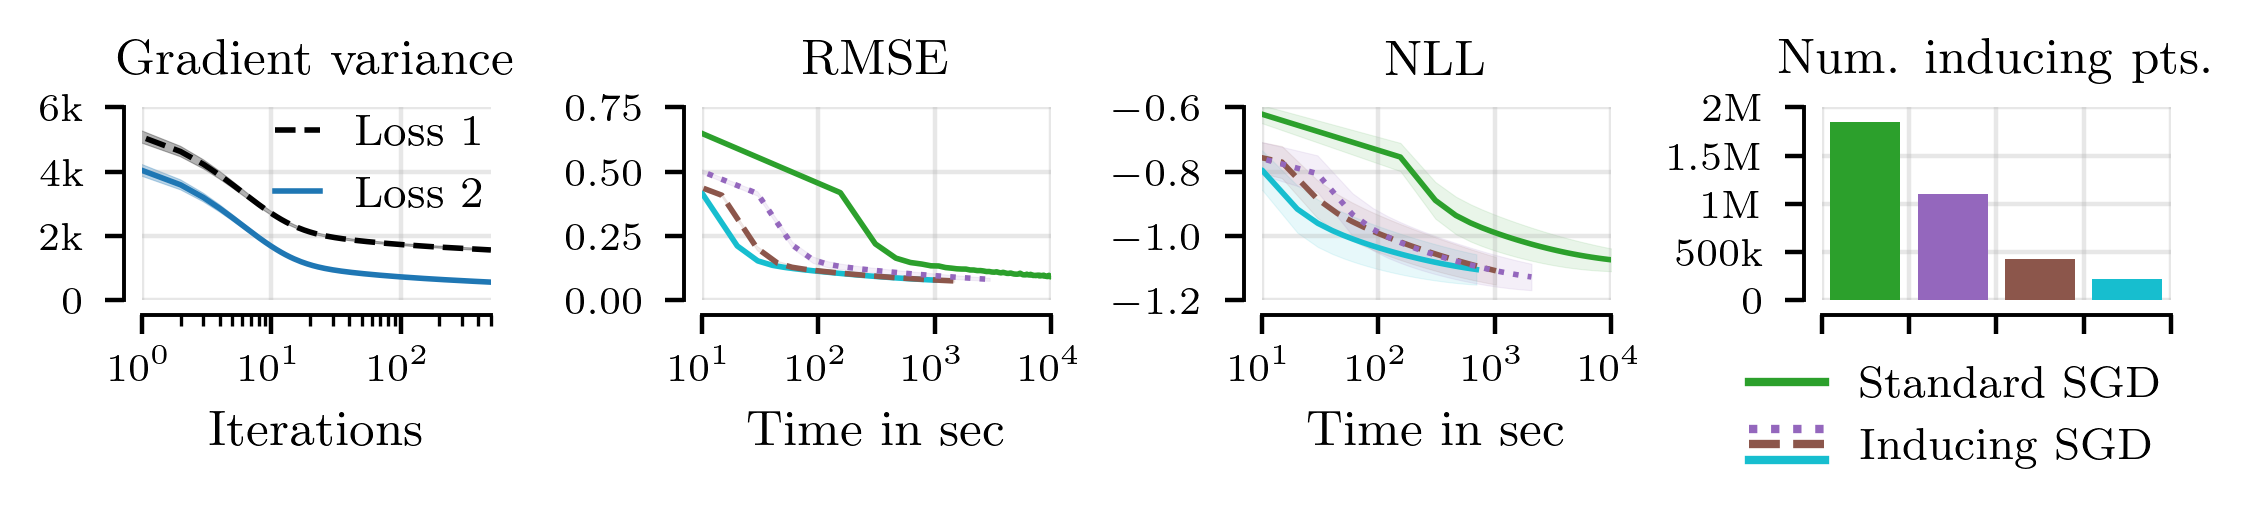

In [7]:
c = ['tab:cyan', 'tab:brown', 'tab:purple']

def get_y_ticks(dataset):
    if dataset == '3droad':
        return [0, 3, 6, 9], None
    elif dataset == 'song':
        return [0, 20, 40, 60], None
    elif dataset == 'buzz':
        return [0, 2000, 4000, 6000], None
    elif dataset == 'houseelectric':
        return [0, 0.1, 0.2, 0.3], None

def get_color_grad_var(loss_idx):
    return ['k', 'tab:blue', 'tab:pink'][loss_idx]

def get_y_ticks_grad_var(dataset):
    if dataset == 'housing':
        return [0, 4, 8, 12], None
    elif dataset == 'pol':
        return [0, 20, 40, 60], None
    elif dataset == 'elevators':
        return [0, 2000, 4000, 6000], ["0", "2k", "4k", "6k"]
    elif dataset == 'bike':
        return [0, 0.1, 0.2, 0.3], None

alpha_line = 1.0
alpha_fill = 0.1
lw = 1
ls = ['-', '--', ':']
n_steps = 70

# for dataset in datasets:
for dataset in ['houseelectric']:
    n_steps = get_n_steps(dataset)
    fig = plt.figure(dpi=400, figsize=[text_width, 0.15 * text_height])

    ax_grad_var = fig.add_subplot(141)
    ax_rmse = fig.add_subplot(142)
    ax_llh = fig.add_subplot(143)
    ax_kept = fig.add_subplot(144)

    axes = [ax_grad_var, ax_rmse, ax_llh, ax_kept]
    for ax in axes:
        ax.grid(alpha=0.3)

        ax.spines[['top', 'right']].set_visible(False)
        ax.spines['bottom'].set_position(('axes', -0.075))
        ax.spines['left'].set_position(('axes', -0.05))

    x_ticks = (10, 100, 1000, 10000)
    for ax in [ax_rmse, ax_llh]:
        ax.set_xlabel("Time in sec")
        ax.set_xscale('log')
        ax.set_xlim(np.min(x_ticks), np.max(x_ticks))
        ax.set_xticks(x_ticks)

    grad_var_dataset = "elevators"
    ax_grad_var.set_title("Gradient variance")
    ax_grad_var.set_xlabel("Iterations")
    # x_ticks = [0, 150, 300, 450]
    # ax_grad_var.set_xlim(np.min(x_ticks), np.max(x_ticks))
    # ax_grad_var.set_xticks(x_ticks)
    ax_grad_var.set_xlim(1, 500)
    ax_grad_var.semilogx()
    y_ticks, y_ticklabels = get_y_ticks_grad_var(grad_var_dataset)
    ax_grad_var.set_ylim(np.min(y_ticks), np.max(y_ticks))
    ax_grad_var.set_yticks(y_ticks)
    if y_ticklabels is not None:
        ax_grad_var.set_yticklabels(y_ticklabels)

    n_splits = grad_var[grad_var_dataset].shape[0]
    mean = np.mean(grad_var[grad_var_dataset], axis=0)
    err = np.std(grad_var[grad_var_dataset], axis=0) / np.sqrt(n_splits)

    for loss_idx in [1, 0]:
        errorfill(ax_grad_var, range(500), mean[loss_idx], err[loss_idx], color=get_color_grad_var(loss_idx),
                  alpha_line=alpha_line, linestyle='-' if loss_idx else '--', label=f"Loss {loss_idx + 1}")

    handles, labels = ax_grad_var.get_legend_handles_labels()
    ax_grad_var.legend(handles[::-1], labels[::-1], fontsize=8, frameon=False, handlelength=1, borderpad=-0.35)

    ax_rmse.set_title("RMSE")
    y_ticks_rmse = [0.0, 0.25, 0.5, 0.75]
    ax_rmse.set_yticks(y_ticks_rmse)
    ax_rmse.set_ylim(np.min(y_ticks_rmse), np.max(y_ticks_rmse))

    ax_llh.set_title("NLL")
    y_ticks_llh = [-1.2, -1.0, -0.8, -0.6]
    ax_llh.set_yticks(y_ticks_llh)
    ax_llh.set_ylim(np.min(y_ticks_llh), np.max(y_ticks_llh))

    n_splits = len(get_splits(dataset))
    mean_rmse = np.mean(results_rmse[dataset]['train/normalised_test_rmse'], axis=0)
    err_rmse = np.std(results_rmse[dataset]['train/normalised_test_rmse'], axis=0) / np.sqrt(n_splits)
    time = np.mean(results_rmse[dataset]['wall_clock_time'], axis=0)

    mean_llh = np.mean(results_llh[dataset]['normalised_test_llh'], axis=0)
    err_llh = np.std(results_llh[dataset]['normalised_test_llh'], axis=0) / np.sqrt(n_splits)

    mean_kept = np.mean(results_llh[dataset]['kept_points'], axis=0)
    err_kept = np.mean(results_llh[dataset]['kept_points'], axis=0) / np.sqrt(n_splits)

    ax_kept.bar(0, 1844352, color='tab:green', zorder=2)

    for i, clustering_ratio in enumerate(clustering_ratios):
        errorfill(ax_rmse, time[i], mean_rmse[i], err_rmse[i], color=c[i],
                  alpha_line=alpha_line, alpha_fill=alpha_fill, linestyle=ls[i], lw=lw)
        errorfill(ax_llh, time[i][:n_steps], -mean_llh[i], err_llh[i], color=c[i],
                  alpha_line=alpha_line, alpha_fill=alpha_fill, linestyle=ls[i], lw=lw)

        ax_kept.bar(len(clustering_ratios) - i, mean_kept[i], color=c[i], zorder=2)
    
    # plot regular sgd rmse
    n_splits = regular_sgd_rmse[dataset]['sgd']['train/normalised_test_rmse'].shape[0]
    regular_sgd_rmse_mean = np.mean(regular_sgd_rmse[dataset]['sgd']['train/normalised_test_rmse'][:3], axis=0)
    regular_sgd_rmse_err = np.std(regular_sgd_rmse[dataset]['sgd']['train/normalised_test_rmse'][:3], axis=0) / np.sqrt(n_splits)
    regular_sgd_time = regular_sgd_rmse[dataset]['sgd']['wall_clock_time'][0]

    errorfill(ax_rmse, regular_sgd_time, regular_sgd_rmse_mean, regular_sgd_rmse_err, color='tab:green',
              alpha_line=alpha_line, alpha_fill=alpha_fill, lw=lw)
    
    # plot regular sgd llh
    n_splits = regular_sgd_llh[dataset]['sgd']['normalised_test_llh'].shape[0]
    regular_sgd_llh_mean = np.mean(regular_sgd_llh[dataset]['sgd']['normalised_test_llh'][:3], axis=0)
    regular_sgd_llh_err = np.std(regular_sgd_llh[dataset]['sgd']['normalised_test_llh'][:3], axis=0) / np.sqrt(n_splits)
    
    stretch_factor = int(len(regular_sgd_time) / len(regular_sgd_llh_mean))
    regular_sgd_llh_mean = np.repeat(regular_sgd_llh_mean, stretch_factor)
    regular_sgd_llh_err = np.repeat(regular_sgd_llh_err, stretch_factor)
    errorfill(ax_llh, regular_sgd_time, -regular_sgd_llh_mean, regular_sgd_llh_err, color='tab:green',
              alpha_line=alpha_line, alpha_fill=alpha_fill, lw=lw)

    # ax_kept.set_xlabel("Clustering Ratio")
    ax_kept.set_xlim(-0.5, 3.5)
    ax_kept.set_xticks([-0.5, 0.5, 1.5, 2.5, 3.5])
    # ax_kept.set_xticklabels(['None'] + clustering_ratios)
    ax_kept.set_xticklabels([])
    # remove_xticks(ax_kept)
    ax_kept.set_ylim(0, 2e6)
    ax_kept.set_yticks([0, 0.5 * 1e6, 1e6, 1.5 * 1e6, 2e6])
    ax_kept.set_yticklabels(["0", "500k", "1M", "1.5M", "2M"])
    ax_kept.set_title("Num. inducing pts.")

    from matplotlib.legend_handler import HandlerBase

    class AnyObjectHandler(HandlerBase):
        def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
            l1 = Line2D([x0,y0+width], [1.0*height, 1.0*height], color=c[2], linestyle=ls[2])
            l2 = Line2D([x0,y0+width], [0.5*height, 0.5*height], color=c[1], linestyle=ls[1])
            l3 = Line2D([x0,y0+width], [0.0*height, 0.0*height], color=c[0], linestyle=ls[0])
            return [l1, l2, l3]

    legend_handles = []
    legend_handles.append(Line2D([], [], color='tab:green', linestyle='-'))
    inducing_sgd_handle = [Line2D([], [], color=c[0], linestyle=ls[0]),
                           Line2D([], [], color=c[1], linestyle=ls[1]),
                           Line2D([], [], color=c[2], linestyle=ls[2])]
    legend_handles.append(object)
    fig.legend(legend_handles, ["Standard SGD", "Inducing SGD"], handler_map={object: AnyObjectHandler()},
               loc='center', bbox_to_anchor=(0.88, 0.2), fontsize=8, frameon=False, handlelength=1.7, borderpad=0.4)

    fig.tight_layout(w_pad=0.5, h_pad=0.2)
    fig.savefig(f"../../figures/grad_var_inducing_sgd.pdf", bbox_inches='tight', pad_inches=0.01)
    fig.savefig(f"../../figures/grad_var_inducing_sgd.png", bbox_inches='tight', pad_inches=0.01)